In [1]:
data <- read.csv("C:\\Users\\LENOVO\\Desktop\\creditcard.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')
table(data$Class)


     0      1 
284315    492 

In [2]:
library(caTools)
set.seed(123)

# Spliting data into training set and test set
split = sample.split(data$Class, SplitRatio = 0.8)
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

In [3]:
#sclaing the fields
training_set[-31] = scale(training_set[-31])
test_set[-31] = scale(test_set[-31])
nrow(training_set)
nrow(test_set)

[1] 227846

[1] 56961

In [4]:
# ROSE Sampling, this helps us to generate data synthetically. It generates artificial datas instead of dulicate data.
library(ROSE)
rose_sample_train_data <- ovun.sample(Class ~ ., data = training_set , method = "under", seed=111)$data
table(rose_sample_train_data$Class)

Loaded ROSE 0.0-3




  0   1 
415 394 

In [5]:
library(randomForest)
library(caret)
#to inform random forest that we are doing classification not regression
rose_sample_train_data$Class <- as.character(rose_sample_train_data$Class)
rose_sample_train_data$Class <- as.factor(rose_sample_train_data$Class)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



In [6]:
rfModel <- randomForest(Class ~ . , data = rose_sample_train_data,ntree=100)
predicted <- predict(rfModel, test_set)

In [7]:
importance(rfModel)

,MeanDecreaseGini
Time,1.700736
V1,3.013498
V2,10.148203
V3,18.714962
V4,46.535619
V5,4.516210
V6,1.944380
V7,13.341690
V8,3.650141
V9,9.581702


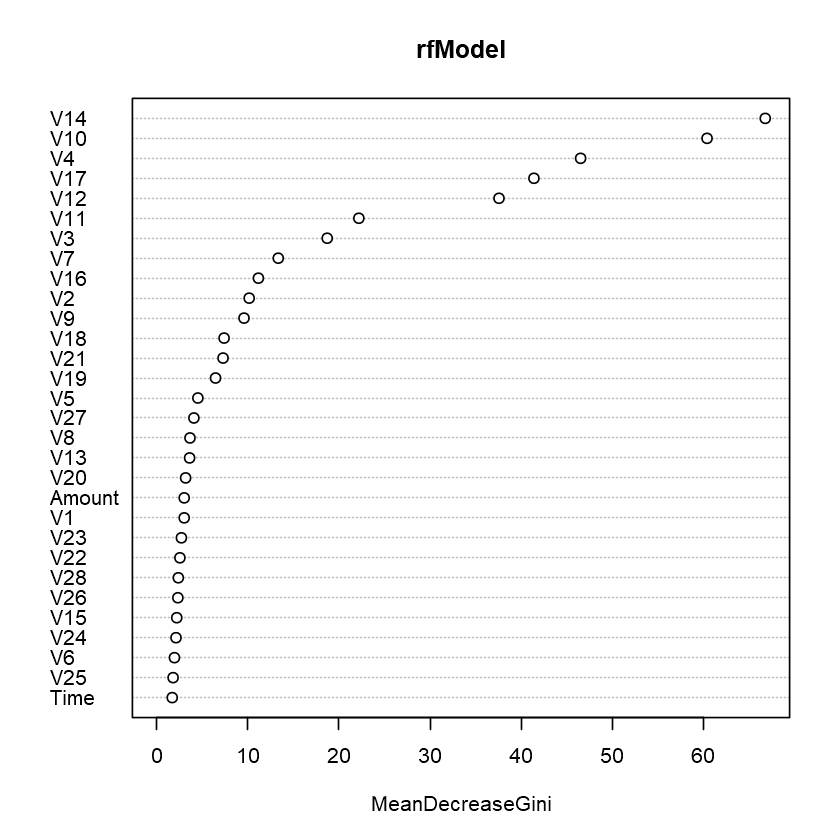

In [11]:
#important variable plotted
varImpPlot(rfModel)

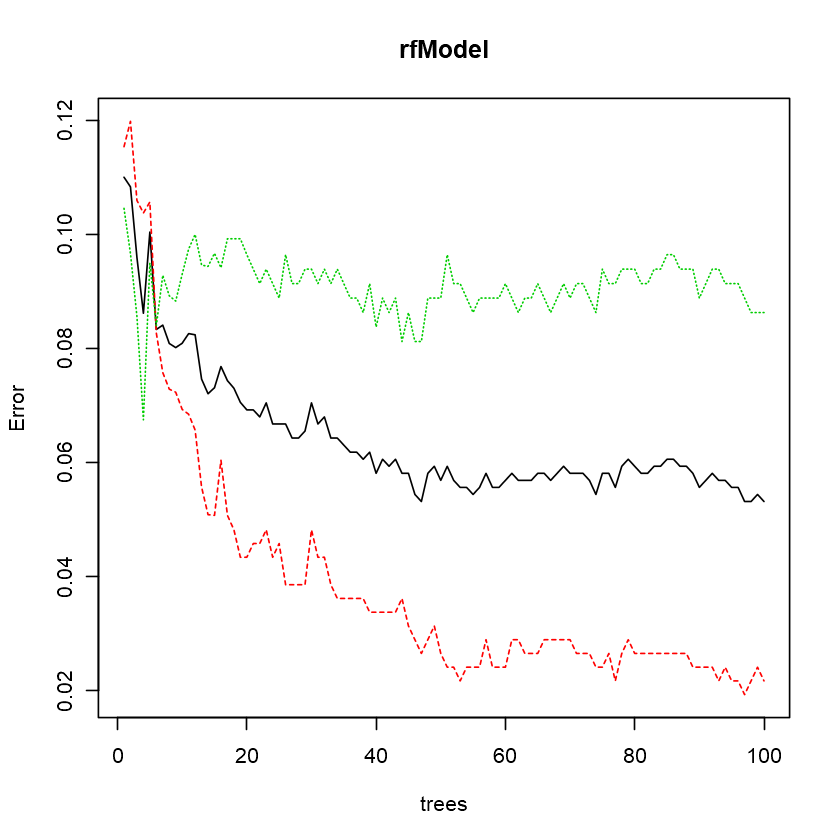

In [12]:
plot(rfModel)